#P4J library must be compiled and installed
#mexican hatt too

-march=x86-64
python setup.py build_ext --inplace
pip install .

In [1]:
import glob
dirs = glob.glob('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/out_directory/*')

In [2]:
import pickle
import random

with (open(dirs[random.randint(0,10000)], "rb")) as openfile:
    load = pickle.load(openfile)

In [3]:
fluxes = []
for dir in dirs[:100]:
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile)
        fluxes.append(load['flux'])

In [4]:
load.keys()

dict_keys(['oid', 'flux', 'time', 'mask', 'ft_cols', 'md_cols'])

In [5]:
from tqdm import tqdm
import numpy as np
r_band_zero_counter = 0
g_band_zero_counter = 0
ft_nans = []
md_nans = []
len_g = []
len_r = []

for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile)
        if load['flux'].sum(axis =0 )[0] == 0:
            g_band_zero_counter +=1
        else:
            len_g.append((load['flux']!=0).sum(axis =0 )[0])
        if load['flux'].sum(axis =0 )[1] == 0:
            r_band_zero_counter +=1
        else:
            len_r.append((load['flux']!=0).sum(axis =0 )[1])
        ft_nans.append(load['ft_cols'].isna().sum())
        md_nans.append(load['md_cols'].isna().sum())

print(f'For a total of {len(dirs)} object, {g_band_zero_counter} have zero observations in the g band, and {r_band_zero_counter} have zero observations in the r band')
print(f'For a total of {len(dirs)} object, the mean nan per objects for the features is {np.mean(ft_nans)} and the mean nan per object for the metadata is {np.mean(md_nans)}')



  0%|          | 0/163430 [00:00<?, ?it/s]

100%|██████████| 163430/163430 [01:52<00:00, 1456.11it/s]


For a total of 163430 object, 18141 have zero observations in the g band, and 17212 have zero observations in the r band
For a total of 163430 object, the mean nan per objects for the features is 12.995703708883664 and the mean nan per object for the metadata is 0.00933383449445372


<Axes: ylabel='Count'>

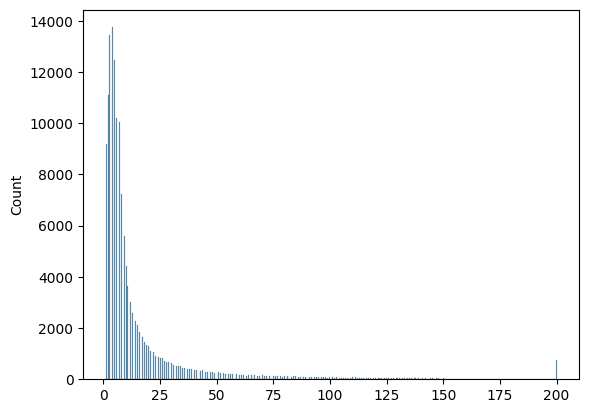

In [7]:
import seaborn as sns

sns.histplot(len_g)

<Axes: ylabel='Count'>

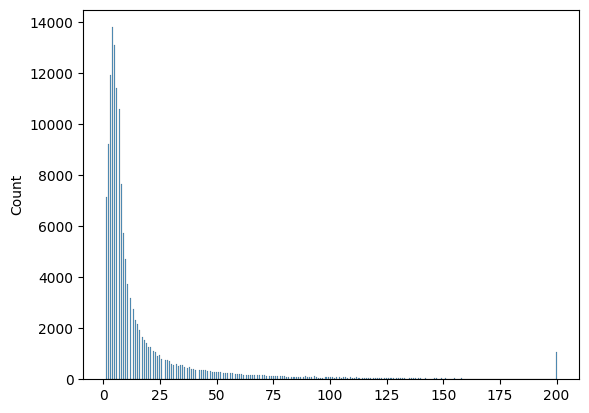

In [8]:
sns.histplot(len_r)


In [13]:
print(f'{np.mean(len_g)} +/- {np.std(len_g)}')
print(f'{np.mean(len_r)}+/- {np.std(len_r)}')


16.236211963741233 +/- 28.039569036463877
17.27770862684485+/- 29.34455760329297


<Axes: >

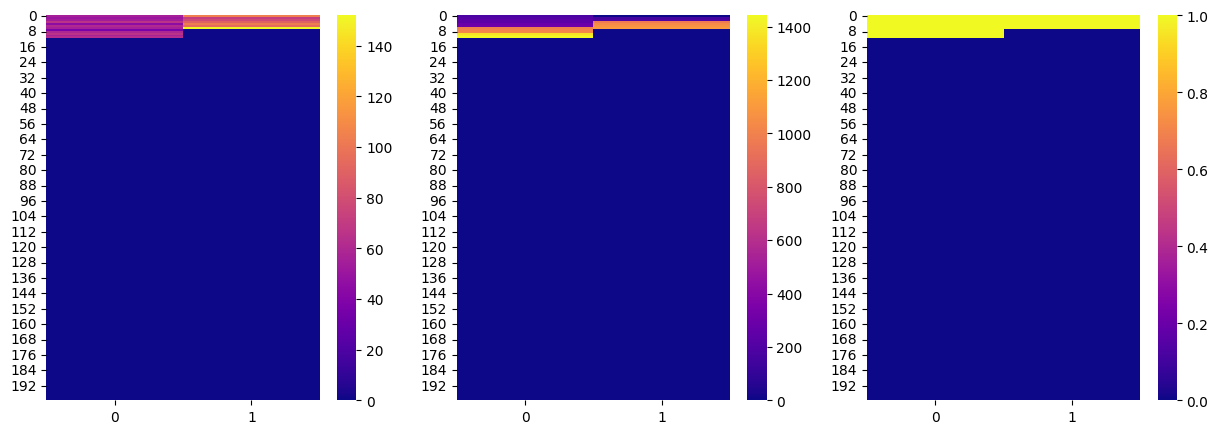

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,ax = plt.subplots(1,3,figsize = (15,5))
sns.heatmap(load['flux'],ax = ax[0], cmap='plasma')
sns.heatmap(load['time'],ax = ax[1], cmap='plasma')
sns.heatmap(load['mask'],ax = ax[2], cmap='plasma')


In [7]:
import pandas as pd
grab_oids = []
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile)
        grab_oids.append(load['oid'])
        

100%|██████████| 163430/163430 [01:08<00:00, 2380.70it/s]


In [8]:
oids_df = pd.DataFrame({'oids':grab_oids}) 
type(oids_df)

pandas.core.frame.DataFrame

In [9]:
def create_single_train_val_split(df_oids: pd.DataFrame,split_frac:float):
    """Will create a train/validation split by splitting a pd dataframe of oids (single column dataframe where index is range of N and column contains the oids)

    Args:
        df_oids (pd.DataFrame): _description_
    """
    assert split_frac < 1
    assert df_oids.empty == False
    assert split_frac > 0
    validation = df_oids.sample(frac=0.2, random_state=42)  # for reproducibility
    #print(validation)
    train = df_oids.loc[~df_oids.index.isin(validation.index)]
    #train = train.values.flatten().tolist()
    #validation = validation.values.flatten().tolist()

    return train,validation

In [10]:
train,test = create_single_train_val_split(oids_df,0.2)

In [11]:
import h5py
import os
def create_h5_file(filename, data_dict):
    """
    Create an HDF5 file and save data from a dictionary.
    
    Parameters:
    filename (str): Name or path of the HDF5 file to create
    data_dict (dict): Dictionary containing the data to save
    """
    # Create directories if they don't exist
    directory = os.path.dirname(filename)
    if directory:
        os.makedirs(directory, exist_ok=True)
    
    with h5py.File(filename, 'w') as f:
        for key, value in data_dict.items():
            if not isinstance(value, np.ndarray):
                value = np.array(value)
            f.create_dataset(key, data=value)
    
    # Return the absolute path of the created file
    return os.path.abspath(filename)

In [27]:
trainvalkeys = {}
for i in range(5):
    train,val = create_single_train_val_split(oids_df,0.2)
    train = train.index.tolist()
    train.sort()
    val = val.index.tolist()
    val.sort()
   # print(train)
    #assert not np.any(np.in1d(train.values.flatten(), val.values.flatten()))
    trainvalkeys.update({f'train_{i}':train})
    trainvalkeys.update({f'validation_{i}':val})


In [29]:
from dataclasses import dataclass
class atat2h5:
    def __init__(self,out_path,input_dir):
        self.out = out_path
        self.input = input_dir
        pass 
    def get_oids():
        pass
    def establish_splits():
        pass
    def get_flux():
        pass 
    def get_mask():
        pass
    def get_time(): 
        pass
    def get_ft():
        pass
    def get_mask():
        pass
    def get_window_feats():
        pass
        

In [30]:
file_path = create_h5_file('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', trainvalkeys)

In [31]:
import h5py
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r') as f:
    # Print original dictionary keys
    
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
    these_idx = f.get('train_0')[:100]
    print(f.get('ft_cols'))
    

HDF5 root level keys: ['train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
None


In [ ]:
import pandas as pd
grab_flux = [] 
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile) 
        grab_flux.append(load['flux'])
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r+') as f:
    # Print original dictionary keys
    f.create_dataset('flux',data =np.array(grab_flux).astype(float) )
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
del grab_flux 


100%|██████████| 163430/163430 [00:44<00:00, 3689.51it/s]


HDF5 root level keys: ['flux', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


In [33]:
grab_time = [] 
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile) 
        grab_time.append(load['time'])
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r+') as f:
    # Print original dictionary keys
    f.create_dataset('time',data =np.array(grab_time).astype(float) )
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
del grab_time

100%|██████████| 163430/163430 [01:02<00:00, 2605.70it/s]


HDF5 root level keys: ['flux', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


In [34]:
grab_mask = [] 
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile) 
        grab_mask.append(load['mask'])
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r+') as f:
    # Print original dictionary keys
    f.create_dataset('mask',data =np.array(grab_mask).astype(float) )
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
del grab_mask


100%|██████████| 163430/163430 [00:42<00:00, 3803.84it/s]


HDF5 root level keys: ['flux', 'mask', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


In [35]:

load['ft_cols'].value.values

array([0.610287285714282, 0.9089990000000014, 0.7605844880952333,
       0.7840539999999994, '2.7609129166666655', '2.0003284285714322',
       '2.7399129166666647', '1.9793284285714314', '4.638912916666666',
       '3.8783284285714323', '7.607912916666665', '6.847328428571432',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       38.43256683611642, 0.30334476550068185, 75.14446219379408, 1.0,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, 0.021811500000000095,
       0.6310586481856593, 1.0, 0.3333333333333333, 0.0,
       3.034004739052569, 0.014731999999995082, 0.005663084965104206,
       16.745912916666665, 0.0007264894207213872, 0.007222000000000506,
       0.3333333333333333, -0.03333333333333333, 0.0017424664193382217,
       0.01125575000000012, 0.25531648944

In [36]:
grab_ft = [] 
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile) 


        feats = pd.DataFrame(load['ft_cols'].value.values)
        fill_value = -9999
        for col in feats.columns:
            feats[col] = feats[col].fillna(fill_value) 
        grab_ft.append(feats.values)




with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r+') as f:
    # Print original dictionary keys
    f.create_dataset('ft_cols',data =np.array(grab_ft).astype(float))
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
#del grab_ft

100%|██████████| 163430/163430 [01:35<00:00, 1708.55it/s]


HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


In [37]:
load['ft_cols'].value

0              0.610287
1              0.908999
2              0.760584
3              0.784054
3    2.7609129166666655
            ...        
7              1.054115
0           1443.063283
0              0.555519
1              0.242083
2              0.795484
Name: value, Length: 181, dtype: object

In [38]:
grab_md = [] 
for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile) 
        feats = pd.DataFrame(load['md_cols'].value.values)
        fill_value = -9999
        for col in feats.columns:
            feats[col] = feats[col].fillna(fill_value) 
        grab_md.append(feats.values)
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r+') as f:
    # Print original dictionary keys
    f.create_dataset('md_cols',data =np.array(grab_md).astype(float) )
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
del grab_md

  0%|          | 0/163430 [00:00<?, ?it/s]

100%|██████████| 163430/163430 [01:15<00:00, 2154.18it/s]


HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


QT transform

In [4]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from tqdm import tqdm
import joblib
import h5py


def create_ft_fold(out_dir, fold_name,seed):
    qt = QuantileTransformer(
    n_quantiles=1000, random_state=0, output_distribution="uniform"
    )   
    collect_feats = []

    with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r') as f:
        # Print original dictionary keys
        
        # Print HDF5 root level keys
        print("HDF5 root level keys:", list(f.keys()))
        these_idx = f.get(f'train_{seed}')
        print(these_idx)
        feats = f.get('ft_cols')[these_idx]
    
    #feats = np.concatenate([feat for feat in collect_feats]) 
    #print(feats)
    print()
    qt.fit(feats.reshape(feats.shape[0],feats.shape[1]))
 
    joblib.dump(qt, f'{out_dir}/{fold_name}_qt-fold-{seed}.joblib')

In [5]:

def create_md_fold(out_dir, fold_name,seed):
    qt = QuantileTransformer(
    n_quantiles=1000, random_state=0, output_distribution="uniform"
    )   
    collect_feats = []

    with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file/test.h5', 'r') as f:
        # Print original dictionary keys
        
        # Print HDF5 root level keys
        print("HDF5 root level keys:", list(f.keys()))
        these_idx = f.get(f'train_{seed}')
        #print(these_idx)
        feats = f.get('md_cols')[these_idx] 
    
   
    #feats = np.concatenate([feat for feat in collect_feats]) 
    #print(feats)
    qt.fit(feats.reshape(feats.shape[0],feats.shape[1]))
 
    joblib.dump(qt, f'{out_dir}/{fold_name}_qt-fold-{seed}.joblib')

In [6]:
for i in range(0,5):
    trans_feat = create_ft_fold('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file','ft',seed=i)
    
    trans_feat = create_md_fold('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/h5file','md',seed=i)

HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
<HDF5 dataset "train_0": shape (130744,), type "<i8">

HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
<HDF5 dataset "train_1": shape (130744,), type "<i8">

HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'trai

In [52]:
np.isinf(feats).sum().sum()

0

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
mean = feats_transformer.mean(axis = 0)
print(mean.shape)


(181,)


In [29]:
import pandas as pd
df = pd.DataFrame(feats_transformer)

In [40]:
df.describe()['mean']

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
count,102473.000000,102473.000000,93850.000000,93850.000000,93812.000000,95104.000000,93814.000000,95105.000000,93731.000000,95033.000000,...,95481.000000,88334.000000,97650.0,97650.000000,97650.00000,90913.000000,130744.000000,130744.000000,130744.000000,130744.000000
mean,0.498787,0.498587,0.496037,0.496265,0.494413,0.493796,0.494305,0.493929,0.495586,0.494902,...,0.500771,0.497042,0.0,0.499448,0.50048,0.500714,0.496094,0.501342,0.502021,0.504381
std,0.288339,0.287868,0.287993,0.287740,0.288386,0.287579,0.288224,0.287625,0.287456,0.287762,...,0.029040,0.288549,0.0,0.046575,0.02986,0.289765,0.289306,0.289241,0.288098,0.288237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250590,0.248064,0.246270,0.248243,0.245022,0.249775,0.244755,0.248251,0.248941,0.245341,...,0.500501,0.250497,0.0,0.497497,0.50000,0.248349,0.248523,0.251653,0.255009,0.255251
50%,0.495384,0.498586,0.497777,0.496853,0.487354,0.490197,0.487246,0.489695,0.495157,0.492692,...,0.500501,0.496347,0.0,0.497497,0.50000,0.498545,0.495716,0.501533,0.501325,0.506731
75%,0.752452,0.748711,0.743594,0.744256,0.743234,0.739403,0.740499,0.742249,0.741837,0.740717,...,0.500501,0.745802,0.0,0.497497,0.50000,0.754079,0.748794,0.755897,0.749523,0.757065
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

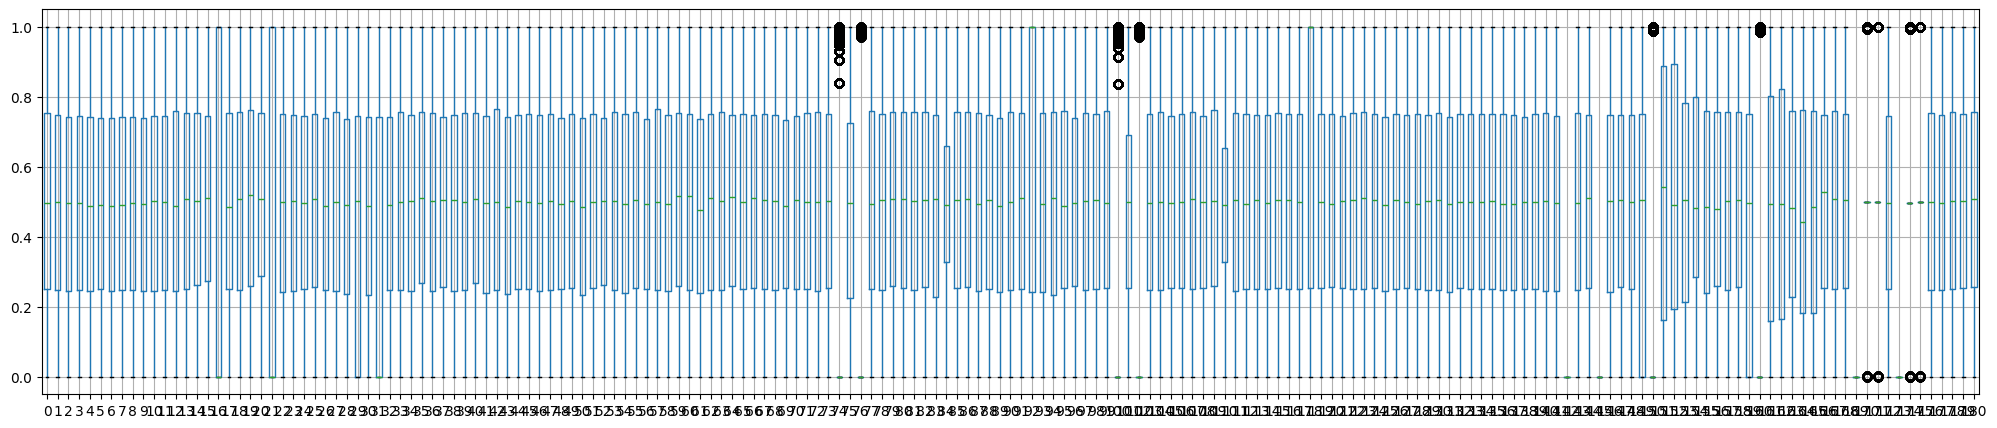

In [46]:
fig, ax = plt.subplots(1,1,figsize = (25,5))
df.boxplot()

<Axes: >

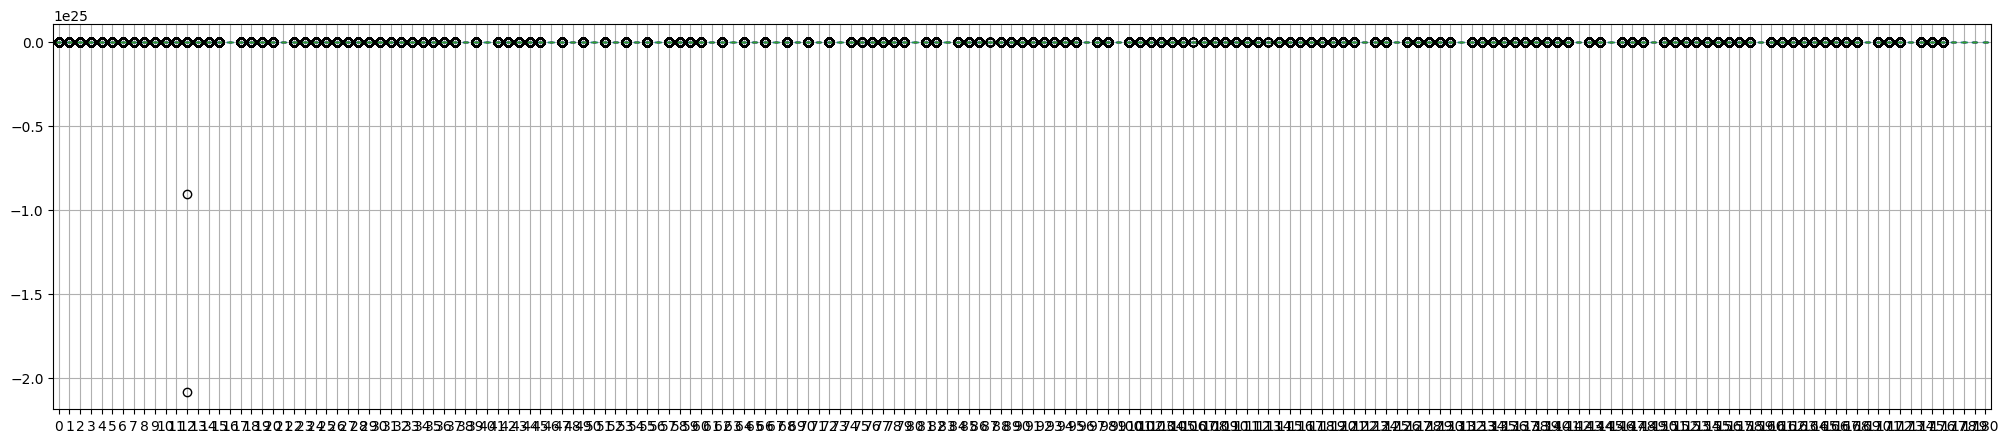

In [45]:
fig, ax = plt.subplots(1,1,figsize = (25,5))
pd.DataFrame(feats).boxplot()

<Axes: >

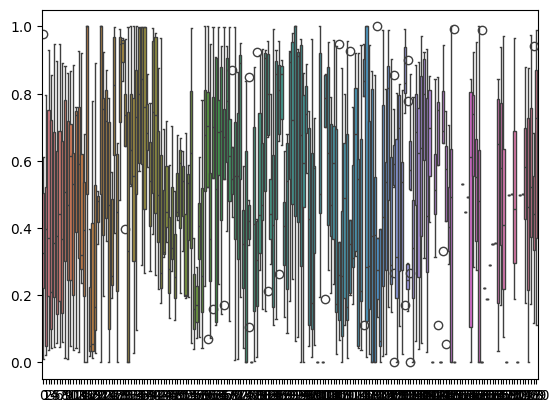

In [21]:
sns.boxplot(data = feats_transformer[:10])

<BarContainer object of 181 artists>

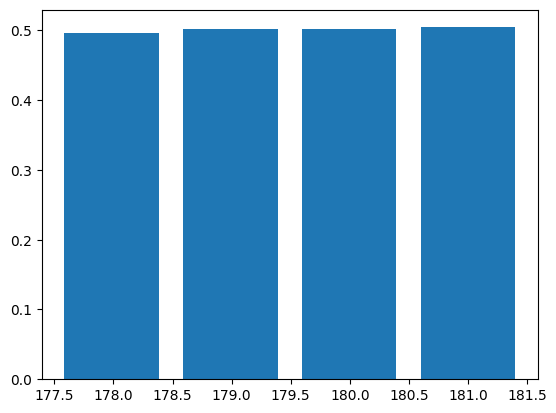

In [15]:
fig, ax = plt.subplots(1,1)
ax.bar(x = np.linspace(0,
                       len(mean),
                           len(mean)), height = mean)
#ax.set_title(f'Metadata QTF ({code_dict[target[rand]]})')

In [84]:

import h5py
import numpy as np
import torch
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/pipeline/training/lc_classifier_ztf/ATAT_ALeRCE/data/datasets/ZTF_ff/final/LC_MD_FEAT_240627_windows_200_12/dataset.h5', 'r') as f:
    # Print original dictionary keys
    these_idx = f.get('training_0')[:]
    # Print HDF5 root level keys
    print(f.get('flux'))
    print("HDF5 root level keys:", list(f.keys()))
    data_ = torch.from_numpy(f.get("flux")[:][these_idx])  
    data = torch.from_numpy(f.get("flux")[:][these_idx])  
 

<HDF5 dataset "flux": shape (252810, 200, 2), type "<f8">
HDF5 root level keys: ['SNID', 'extracted_feat_1024', 'extracted_feat_128', 'extracted_feat_16', 'extracted_feat_2048', 'extracted_feat_256', 'extracted_feat_32', 'extracted_feat_512', 'extracted_feat_64', 'flux', 'flux_err', 'labels', 'mask', 'mask_detection', 'mask_photometry', 'metadata_feat', 'test', 'time', 'time_detection', 'time_photometry', 'training_0', 'validation_0']


tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [T

In [71]:
import h5py
import numpy as np
import torch
with h5py.File('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/pipeline/training/lc_classifier_ztf/ATAT_ALeRCE/data/datasets/h5file/dataset.h5', 'r') as f:
    # Print original dictionary keys
    these_idx = f.get('train_0')[:]
    # Print HDF5 root level keys
    print(f.get('flux'))

    print("HDF5 root level keys:", list(f.keys()))
    data = torch.from_numpy(f.get("flux")[:][these_idx])  
print(data.shape) 
print(data[0,:,:])


<HDF5 dataset "flux": shape (163430, 200, 2), type "<f8">
HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']
torch.Size([130744, 200, 2])
tensor([[ 6959.2109,  2220.9440],
        [ 2922.1439, -2604.8025],
        [ -482.0166,     0.0000],
        [-1452.9531,     0.0000],
        [ 1527.2256,     0.0000],
        [ -982.6164,     0.0000],
        [ 1711.6036,     0.0000],
        [ 1915.7057,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.0000],
        [    0.0000,     0.00

In [ ]:
data_[0] == data